In [42]:
%pip install gtab
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn


   ---------------------------------------- 0.0/863.8 kB ? eta -:--:--
   ---------------------------------------- 10.2/863.8 kB ? eta -:--:--
    -------------------------------------- 20.5/863.8 kB 330.3 kB/s eta 0:00:03
   -- ------------------------------------ 51.2/863.8 kB 660.6 kB/s eta 0:00:02
   ------------ --------------------------- 266.2/863.8 kB 2.3 MB/s eta 0:00:01
   -------------------------- ------------- 573.4/863.8 kB 4.0 MB/s eta 0:00:01
   ---------------------------------------  860.2/863.8 kB 4.9 MB/s eta 0:00:01
   ---------------------------------------- 863.8/863.8 kB 4.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.7 MB 9.3 MB/s eta 0:00:01
   -------------- ------------------------- 0.6/1.7 MB 7.6 MB/s eta 0:00:01
   --------------------- ------------------ 0.9/1.7 MB 8.2 MB/s eta 0:00:01
   ---------------------------- ----------- 1.2/1.7 MB 8.4 MB/s eta 0:00:01
   -

ERROR: Could not install packages due to an OSError: [WinError 2] The system cannot find the file specified: 'c:\\Python312\\Scripts\\gtab-create.exe' -> 'c:\\Python312\\Scripts\\gtab-create.exe.deleteme'


[notice] A new release of pip is available: 23.3 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [43]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates


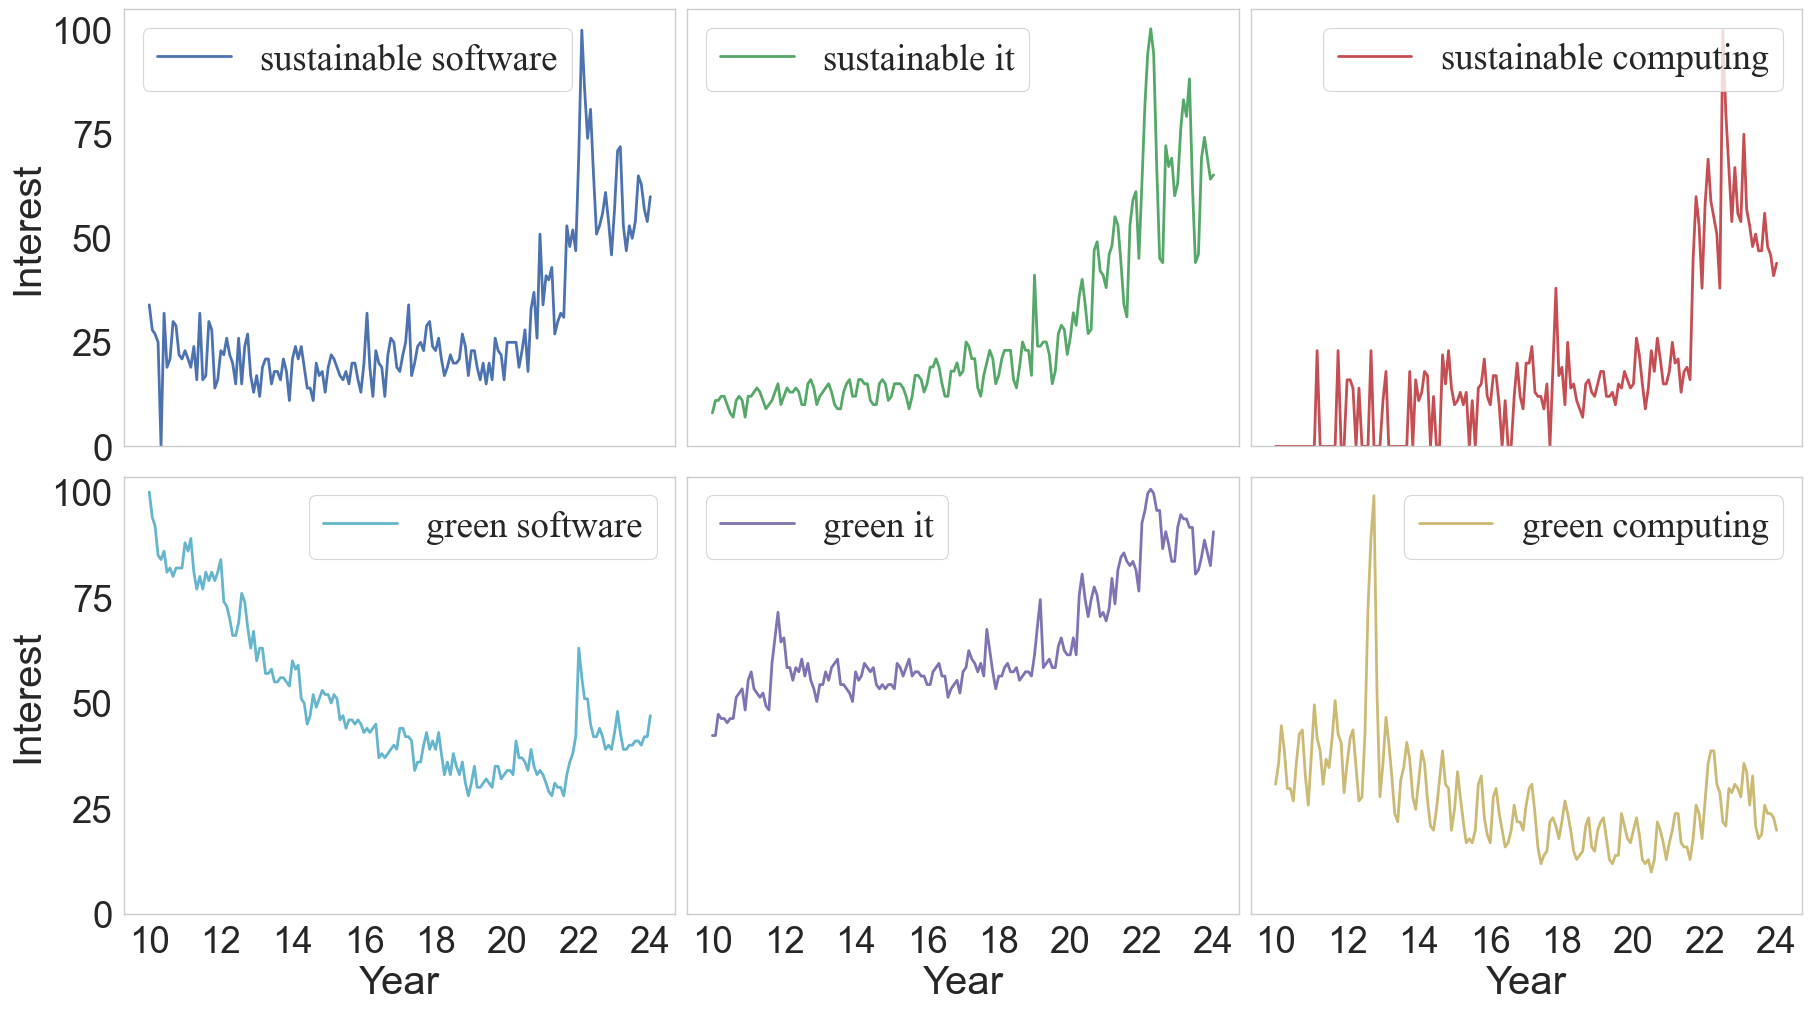

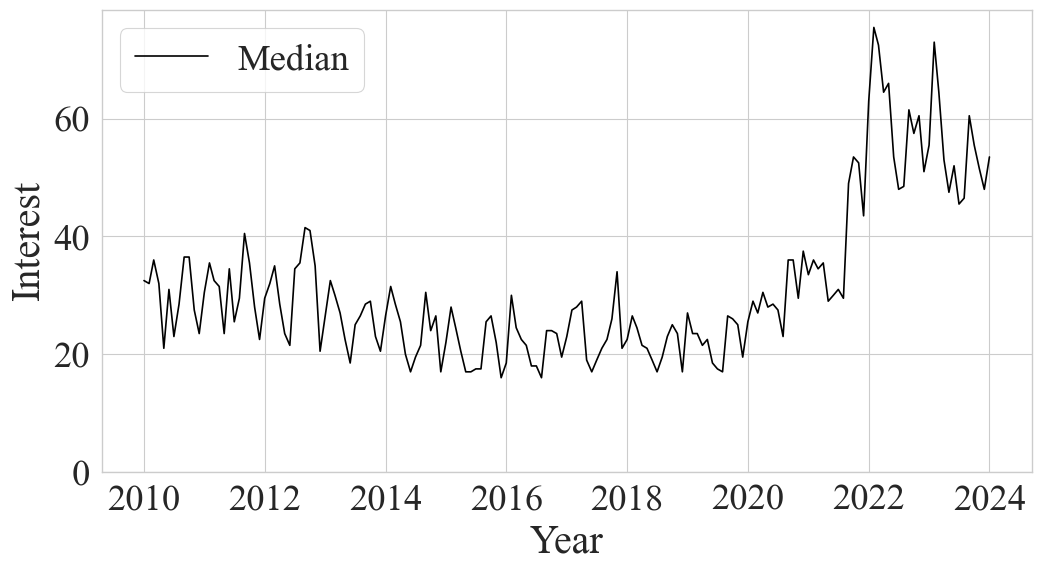

In [49]:
search_terms = ['sustainable software',
                'sustainable it',
                 'sustainable computing',
                 'green software',
                 'green it',
                 'green computing']

df_combined = pd.DataFrame()

for term in search_terms:
    file_path = f'./data/{term}.csv'
    df = pd.read_csv(file_path)
    
    df.columns = ['Month', term]
    
    df['Month'] = pd.to_datetime(df['Month'])
    
    df.set_index('Month', inplace=True)
    
    if df_combined.empty:
        df_combined = df
    else:
        df_combined = df_combined.join(df, how='outer')

sns.set_theme(style="whitegrid")
sns.set_context("paper", font_scale=3)  
colors = ['b', 'g', 'r', 'c', 'm', 'y']  

fig, axs = plt.subplots(2, 3, figsize=(18, 10), constrained_layout=True)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

for i, term in enumerate(search_terms):
    ax = axs[i//3, i%3]
    ax.plot(df_combined.index, df_combined[term], linestyle='-', label=term, color=colors[i], linewidth=2)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%y'))
    if i//3 == 1:  # Bottom row
        ax.set_xlabel('Year')
    else:
        ax.set_xticks([])
    if i%3 == 0:  # Left column
        ax.set_ylabel('Interest')
    else:
        ax.set_yticks([])
    ax.grid(False)
    ax.set_ylim(0)
    ax.legend()
plt.savefig('gtrends.pdf', format='pdf', bbox_inches='tight')
plt.show()

# Median plot
plt.figure(figsize=(12, 6))
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
df_combined['Median'] = df_combined.median(axis=1)
plt.plot(df_combined.index, df_combined['Median'], linestyle='-', label='Median', color='black')
plt.xlabel('Year')
plt.ylabel('Interest')
plt.legend()
plt.ylim(0)
plt.grid(True)
plt.savefig('median.pdf', format='pdf', bbox_inches='tight')
plt.show()